## <center> [Turtle Rescue Forecast Challenge](https://zindi.africa/competitions/turtle-rescue-forecast-challenge) </center>
---



#### <center> Can you forecast the number of turtles rescued per site per week in Kenya?


#### <center> The objective of this competition is to create a machine learning model to help Kenyan non-profit organization Local Ocean Conservation anticipate the number of turtles they will rescue from each of their rescue sites as part of their By-Catch Release Programme.</center>


---
#### Team work: 
- Stefanie Groeneveld-Krentz
- Ester Bleskadit-Stier
- Mahmoud Jaber 

In [1]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [2]:
# print out the variable-names and their descriptions
var_def = pd.read_csv('data/variable_definitions.csv', encoding='cp1252')

# this will set the Description colum to left-alignment and with larger width
var_def.style.set_properties(**{'text-align': 'left'}, subset='Description', **{'width': '600px'})

,Variables,Description
0,Rescue_ID,"It’s an individual bycatch incidence identity number. The numbers are consecutive, for each year e.g. 2018_RE_0732 means rescue number 732 in year 2018"
1,Date_TimeCaught,Date the turtle is captured e.g. 06/01/2018
2,Researcher,Name of bycatch officer(s) involved with specific rescue
3,Capture Site,"Area where turtle was captured, as reported by the fisher."
4,Foraging Ground,General area of ocean area where turtle was captured. The assumption is that the turtle was foraging where it was captured. The foraging area is broadly classified either as the open ocean or creek section
5,Capture Method,Fishing gear or method used by fishers to capture the turtle
6,Fisher,Name of the fisher who captured the turtle
7,Landing_Site,Section of beach where turtle is landed.
8,Species,"Species of turtle (e.g. green turtle, hawksbill, loggerhead etc.)"
9,Tag_1,"Individual / unique number used to identify a turtle. Each turtle that is captured is tagged. Formats of tag numbers have been changed over years, although turtles retain their old tags even when recaptured (unless the tags are about to fall or are too tight, then they are replaced)."


In [3]:
# merge the information of CaptureSite_category to the main table 'train'

df1 = pd.read_csv('data/train.csv', sep=',')                    # imports main data table
df2 = pd.read_csv('data/CaptureSite_category.csv', sep=',')     # imports additional data on CaptureSite_category

df_raw = df1.merge(df2, on=['CaptureSite'], how='left')         # merges 

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rescue_ID              18062 non-null  object 
 1   Date_TimeCaught        18062 non-null  object 
 2   Researcher             18062 non-null  object 
 3   CaptureSite            18062 non-null  object 
 4   ForagingGround         18062 non-null  object 
 5   CaptureMethod          18062 non-null  object 
 6   Fisher                 18062 non-null  object 
 7   LandingSite            18062 non-null  object 
 8   Species                18062 non-null  object 
 9   Tag_1                  17937 non-null  object 
 10  Tag_2                  4911 non-null   object 
 11  Lost_Tags              925 non-null    object 
 12  T_Number               38 non-null     object 
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  We

<span style="color:plum">

23 columns with 3 floats and rest are objects (categories, texts)

---

In [4]:
print('---number of missing values---')
df_raw.isnull().sum()

---number of missing values---


Rescue_ID                    0
Date_TimeCaught              0
Researcher                   0
CaptureSite                  0
ForagingGround               0
CaptureMethod                0
Fisher                       0
LandingSite                  0
Species                      0
Tag_1                      125
Tag_2                    13151
Lost_Tags                17137
T_Number                 18024
CCL_cm                      24
CCW_cm                      27
Weight_Kg                 5409
Sex                       4330
TurtleCharacteristics       52
Status                    3633
ReleaseSite                 75
Date_TimeRelease          6108
CaptureSiteCategory          0
Type                         0
dtype: int64

<span style="color: plum">

- there are thousands missing in Tag2, Lost_Tags and T_Number. 
- those columns will be dropped later as they dont contain a lot of useful information

- weight could be imputed if necessary
- rows with sex NaN might be dropped if we choose to use this column
---

In [5]:
# drop columns I think I wont need at all (text or same infos)
# tag1, tag2, lost_tags, T_number, TurtleCharacteristics
df_raw.drop(['Tag_2', 'Lost_Tags', 'T_Number'], axis=1, inplace=True)

In [6]:
df_raw.head(15)

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1
5,2002_RE_0119,2002-08-10,Researcher_25,CaptureSite_0,Ocean,Not_Recorded,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0114,33.20,30.70,NaN,Unknown,large chip 6 LM,Released,ReleaseSite_8,10/08/02,CaptureSiteCategory_2,Type_1
6,2002_RE_0214,2002-10-21,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_2013,LandingSite_CaptureSiteCategory_2,Species_6,KA460,37.40,33.50,NaN,Unknown,green and whitish-pink calcerous algae growth ...,Released,ReleaseSite_62,21/10/02,CaptureSiteCategory_2,Type_1
7,2002_RE_0215,2002-10-21,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1815,LandingSite_CaptureSiteCategory_2,Species_6,KA442,40.30,37.20,NaN,Unknown,calcerous algae growth-especially rear end and...,Released,ReleaseSite_50,21/10/02,CaptureSiteCategory_2,Type_1
8,2002_RE_0218,2002-10-22,Researcher_30,CaptureSite_0,Ocean,Net,Fisher_1815,LandingSite_CaptureSiteCategory_2,Species_5,KA466,44.00,43.20,NaN,Unknown,clean shell,Released,ReleaseSite_50,22/10/02,CaptureSiteCategory_2,Type_1
9,2003_RE_0187,2003-06-09,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1066,LandingSite_CaptureSiteCategory_2,Species_5,KE1184,48.30,43.30,NaN,Unknown,10 LMS has a small chip& right rear flipper is...,Released,ReleaseSite_62,NaN,CaptureSiteCategory_2,Type_1


<span style="color:plum">

### further columns to drop:
* LandingSite (contains info of CaptureSite+Category, redundant),
* Tag_1
* TurtleCharacteristics (free text, extra commas will lead to mix ups in a lot of lines for the 3following columns, dont want to "clean"/use this right now)
* Status (mixed up)
* ReleaseSite (mixed up)
* Date_TimeRelease (mixed up)
* the two next columns are not mixed up since these are from the other csv
---

In [7]:
df_raw.drop(['LandingSite', 
             'Tag_1', 
             'TurtleCharacteristics',
             'Status',
             'ReleaseSite',
             'Date_TimeRelease'], axis=1, inplace=True)

df_raw.head(15)

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,Species,CCL_cm,CCW_cm,Weight_Kg,Sex,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,Species_6,64.70,62.60,NaN,Unknown,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,Species_6,35.85,31.35,NaN,Unknown,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,Species_5,51.80,49.20,NaN,Unknown,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,Species_6,60.50,59.00,NaN,Unknown,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,Species_5,34.70,33.00,NaN,Unknown,CaptureSiteCategory_2,Type_1
5,2002_RE_0119,2002-08-10,Researcher_25,CaptureSite_0,Ocean,Not_Recorded,Fisher_1918,Species_5,33.20,30.70,NaN,Unknown,CaptureSiteCategory_2,Type_1
6,2002_RE_0214,2002-10-21,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_2013,Species_6,37.40,33.50,NaN,Unknown,CaptureSiteCategory_2,Type_1
7,2002_RE_0215,2002-10-21,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1815,Species_6,40.30,37.20,NaN,Unknown,CaptureSiteCategory_2,Type_1
8,2002_RE_0218,2002-10-22,Researcher_30,CaptureSite_0,Ocean,Net,Fisher_1815,Species_5,44.00,43.20,NaN,Unknown,CaptureSiteCategory_2,Type_1
9,2003_RE_0187,2003-06-09,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1066,Species_5,48.30,43.30,NaN,Unknown,CaptureSiteCategory_2,Type_1


In [8]:
# check for duplicate rows and print those rows

duplicateRows = df_raw[df_raw.duplicated()]
duplicateRows

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,Species,CCL_cm,CCW_cm,Weight_Kg,Sex,CaptureSiteCategory,Type


In [9]:
df_raw.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'Species', 'CCL_cm',
       'CCW_cm', 'Weight_Kg', 'Sex', 'CaptureSiteCategory', 'Type'],
      dtype='object')

In [10]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
CCL_cm,18038.0,43.090390,11.004251,2.00,36.33,41.3,47.0,122.75
CCW_cm,18035.0,40.253904,9.933058,2.00,34.00,39.3,44.1,106.00
Weight_Kg,12653.0,9.850731,9.737378,0.02,5.00,7.5,10.8,140.00


<span style='color:plum'>

* there are only 3 columns with numerical values (length, width, weight)
* all other columns are categorical
* look at distributions of numerical values
---

<Axes: xlabel='Weight_Kg'>

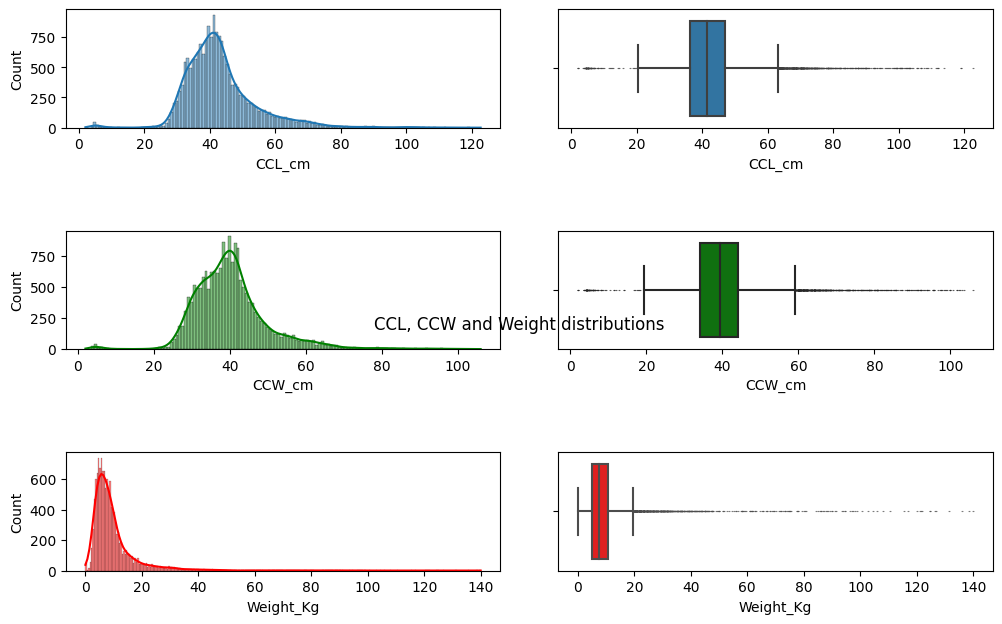

In [11]:
fig, axes = plt.subplots(3, 2, figsize = (10,3), sharex=False)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=None, hspace=None)

fig.suptitle('CCL, CCW and Weight distributions')
sns.histplot(ax=axes[0, 0], data=df_raw, x="CCL_cm", kde=True)
sns.histplot(ax=axes[1, 0], data=df_raw, x="CCW_cm", kde=True, color='green')
sns.histplot(ax=axes[2, 0], data=df_raw, x="Weight_Kg", kde=True, color='red')

sns.boxplot(ax=axes[0, 1], data=df_raw, x="CCL_cm",fliersize=0.2)
sns.boxplot(ax=axes[1, 1], data=df_raw, x="CCW_cm",fliersize=0.2, color='green')
sns.boxplot(ax=axes[2, 1], data=df_raw, x="Weight_Kg",fliersize=0.2, color='red')

In [12]:
df_numerics = df_raw[['CCL_cm','CCW_cm', 'Weight_Kg']]
df_numerics.corr()

,CCL_cm,CCW_cm,Weight_Kg
CCL_cm,1.000000,0.985322,0.883661
CCW_cm,0.985322,1.000000,0.870079
Weight_Kg,0.883661,0.870079,1.000000


<span style="color:plum">

* in all three columns there are a lot of outliers. keep in mind for later scaling.
* CCL and CCW seem to be highly correlated. check all three in .corr()
* keep only one of the two CCL_cm or CCW_cm
---

In [13]:
df_raw.drop('CCL_cm', axis=1, inplace=True)

In [14]:
# now check for unique values or anything strange in the categorical columns
df_raw.nunique()

Rescue_ID              18062
Date_TimeCaught         5237
Researcher                35
CaptureSite               29
ForagingGround             3
CaptureMethod             15
Fisher                  2085
Species                    8
CCW_cm                  1262
Weight_Kg               1937
Sex                        4
CaptureSiteCategory        5
Type                       2
dtype: int64

In [15]:
for i in df_raw.columns:
    print('Unique values in column', {i}, df_raw[i].nunique(), '\n\n', df_raw[i].unique(), '\n', '--------'*10, '\n')

Unique values in column {'Rescue_ID'} 18062 

 ['2000_RE_0060' '2001_RE_0187' '2001_RE_0197' ... '2018_RE_1532'
 '2018_RE_1533' '2018_RE_1550'] 
 -------------------------------------------------------------------------------- 

Unique values in column {'Date_TimeCaught'} 5237 

 ['2000-12-22' '2001-10-28' '2001-11-01' ... '2017-10-21' '2018-06-01'
 '2018-06-16'] 
 -------------------------------------------------------------------------------- 

Unique values in column {'Researcher'} 35 

 ['Researcher_25' 'Researcher_6' 'Researcher_32' 'Researcher_30'
 'Researcher_10' 'Researcher_20' 'Researcher_7' 'Researcher_4'
 'Researcher_1' 'Researcher_13' 'Researcher_11' 'Researcher_31'
 'Researcher_9' 'Researcher_37' 'Researcher_5' 'Researcher_8'
 'Researcher_17' 'Researcher_19' 'Researcher_3' 'Researcher_0'
 'Researcher_36' 'Researcher_27' 'Researcher_14' 'Researcher_22'
 'Researcher_21' 'Researcher_28' 'Researcher_34' 'Researcher_16'
 'Researcher_24' 'Researcher_18' 'Researcher_2' 'Researche

<span style="color:tomato">

### So, the following 3 columns need further Cleaning:
</span>

|column|unique values|nans or strange values|
|---|---|---|
|Researcher|35|no|
|CaptureSite|29|no|
|ForagingGround |3|yes: "Creek" and "creek"|
|CaptureMethod|15|needs a lot of cleaning! 'Net'/'net' 'By Hand'/'by hand', 'Jarife'/'jarife', not_recorded |
|Fisher|2085|no|
|Species|8|no|
|Sex|4| NaNs + male / female / not recorded / unknown|
|CaptureSiteCategory|5|no|
|Type|2|no|

<span style="color:plum">

Next I want to clean all categorical columns. 
* Reduce to numbers BUT leave them as "object"
* clean double entries
* make "unknowns" and "not_recorded" to NaNs
---

In [16]:
df_raw['Researcher'] = df_raw['Researcher'].astype(str)
df_raw['Researcher'] = df_raw['Researcher'].str.extract('(\d+)').astype(object)

df_raw['CaptureSite'] = df_raw['CaptureSite'].astype(str)
df_raw['CaptureSite'] = df_raw['CaptureSite'].str.extract('(\d+)').astype(object)

df_raw['Species'] = df_raw['Species'].astype(str)
df_raw['Species'] = df_raw['Species'].str.extract('(\d+)').astype(object)

df_raw['Fisher'] = df_raw['Fisher'].astype(str)
df_raw['Fisher'] = df_raw['Fisher'].str.extract('(\d+)').astype(object)

df_raw['CaptureSiteCategory'] = df_raw['CaptureSiteCategory'].astype(str)
df_raw['CaptureSiteCategory'] = df_raw['CaptureSiteCategory'].str.extract('(\d+)').astype(object)

df_raw['Type'] = df_raw['Type'].astype(str)
df_raw['Type'] = df_raw['Type'].str.extract('(\d+)').astype(object)

#lowercase the ForeagingGround

df_raw['ForagingGround'] = df_raw['ForagingGround'].astype(str)
df_raw['ForagingGround'] = df_raw['ForagingGround'].str.lower().astype(object)

#recode "missing" data to NaN
df_raw['CaptureMethod'].replace('Not_Recorded', np.nan, inplace=True)
df_raw['CaptureMethod'] = df_raw['CaptureMethod'].str.lower().astype(object)

df_raw['Sex'].replace('Unknown', np.nan, inplace=True)
df_raw['Sex'].replace('Not_Recorded', np.nan, inplace=True)
df_raw['Sex'] = df_raw['Sex'].str.lower().astype(object)

<span style=color:plum>

### check values again:

In [17]:
for i in df_raw.columns:
    print('Unique values in column', {i}, df_raw[i].nunique(), '\n\n', df_raw[i].unique(), '\n', '--------'*10, '\n')

Unique values in column {'Rescue_ID'} 18062 

 ['2000_RE_0060' '2001_RE_0187' '2001_RE_0197' ... '2018_RE_1532'
 '2018_RE_1533' '2018_RE_1550'] 
 -------------------------------------------------------------------------------- 

Unique values in column {'Date_TimeCaught'} 5237 

 ['2000-12-22' '2001-10-28' '2001-11-01' ... '2017-10-21' '2018-06-01'
 '2018-06-16'] 
 -------------------------------------------------------------------------------- 

Unique values in column {'Researcher'} 35 

 ['25' '6' '32' '30' '10' '20' '7' '4' '1' '13' '11' '31' '9' '37' '5' '8'
 '17' '19' '3' '0' '36' '27' '14' '22' '21' '28' '34' '16' '24' '18' '2'
 '35' '12' '26' '23'] 
 -------------------------------------------------------------------------------- 

Unique values in column {'CaptureSite'} 29 

 ['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '3' '4' '5' '6' '7' '8' '9'] 
 ----------------------------------------------------------------

In [18]:
df_raw.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,Species,CCW_cm,Weight_Kg,Sex,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,25,0,ocean,net,1072,6,62.60,NaN,NaN,2,1
1,2001_RE_0187,2001-10-28,6,0,ocean,net,520,6,31.35,NaN,NaN,2,1
2,2001_RE_0197,2001-11-01,6,0,ocean,net,1669,5,49.20,NaN,NaN,2,1
3,2002_RE_0031,2002-03-11,32,0,ocean,net,1798,6,59.00,NaN,NaN,2,1
4,2002_RE_0118,2002-08-08,25,0,ocean,beached,1918,5,33.00,NaN,NaN,2,1


In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rescue_ID            18062 non-null  object 
 1   Date_TimeCaught      18062 non-null  object 
 2   Researcher           18062 non-null  object 
 3   CaptureSite          18062 non-null  object 
 4   ForagingGround       18062 non-null  object 
 5   CaptureMethod        17976 non-null  object 
 6   Fisher               18062 non-null  object 
 7   Species              18062 non-null  object 
 8   CCW_cm               18035 non-null  float64
 9   Weight_Kg            12653 non-null  float64
 10  Sex                  152 non-null    object 
 11  CaptureSiteCategory  18062 non-null  object 
 12  Type                 18062 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.8+ MB


In [20]:
df_raw.isnull().sum()

Rescue_ID                  0
Date_TimeCaught            0
Researcher                 0
CaptureSite                0
ForagingGround             0
CaptureMethod             86
Fisher                     0
Species                    0
CCW_cm                    27
Weight_Kg               5409
Sex                    17910
CaptureSiteCategory        0
Type                       0
dtype: int64

<span style="color: plum">

 - weight and CCW could be imputed if I decide it might be necessary for modelling
 - Sex is nearly empty after recoding "unknown"/"not_recorded" to true NaNs, drop this column
 - CaptureMethod, we will see if I use this feature...

 ---

In [21]:
df_raw.Sex.value_counts()

Sex
female    113
male       39
Name: count, dtype: int64

In [22]:
df_raw.drop('Sex', axis=1, inplace=True)

<span style=color:plum>

Now, work with the date column, extract individual parts (week, day...)

---

In [23]:
df_raw['catch_fulldate'] = pd.to_datetime(df_raw['Date_TimeCaught'], format='%Y-%m-%d')

#drop the original datetime column
df_raw.drop('Date_TimeCaught', axis=1, inplace=True)

# extract year, month, dayofweek information and build new column for each
df_raw["catch_year"]=df_raw["catch_fulldate"].dt.year.astype('object')
df_raw["catch_month"]=df_raw["catch_fulldate"].dt.month.astype('object')
df_raw["catch_weekofyear"]=df_raw["catch_fulldate"].dt.isocalendar().week.astype('object')
df_raw["catch_dayofyear"]=df_raw["catch_fulldate"].dt.day_of_year.astype('object')
df_raw["catch_dayofweek"]=df_raw["catch_fulldate"].dt.dayofweek.astype('object')

# weekofyear has format Uint32 that doesnt really work in plots
#df_raw['catch_weekofyear'] = df_raw['catch_weekofyear'].astype('int')


In [24]:
df_raw

,Rescue_ID,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,Species,CCW_cm,Weight_Kg,CaptureSiteCategory,Type,catch_fulldate,catch_year,catch_month,catch_weekofyear,catch_dayofyear,catch_dayofweek
0,2000_RE_0060,25,0,ocean,net,1072,6,62.60,NaN,2,1,2000-12-22,2000,12,51,357,4
1,2001_RE_0187,6,0,ocean,net,520,6,31.35,NaN,2,1,2001-10-28,2001,10,43,301,6
2,2001_RE_0197,6,0,ocean,net,1669,5,49.20,NaN,2,1,2001-11-01,2001,11,44,305,3
3,2002_RE_0031,32,0,ocean,net,1798,6,59.00,NaN,2,1,2002-03-11,2002,3,11,70,0
4,2002_RE_0118,25,0,ocean,beached,1918,5,33.00,NaN,2,1,2002-08-08,2002,8,32,220,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,2018_RE_1511,30,9,ocean,net,569,5,50.57,21.09,1,1,2018-12-18,2018,12,51,352,1
18058,2018_RE_1514,30,9,ocean,net,125,6,38.37,9.02,1,1,2018-12-18,2018,12,51,352,1
18059,2018_RE_1532,30,9,ocean,net,1343,5,52.30,NaN,1,1,2018-12-24,2018,12,52,358,0
18060,2018_RE_1533,30,9,ocean,net,1551,5,48.50,NaN,1,1,2018-12-24,2018,12,52,358,0


In [25]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rescue_ID            18062 non-null  object        
 1   Researcher           18062 non-null  object        
 2   CaptureSite          18062 non-null  object        
 3   ForagingGround       18062 non-null  object        
 4   CaptureMethod        17976 non-null  object        
 5   Fisher               18062 non-null  object        
 6   Species              18062 non-null  object        
 7   CCW_cm               18035 non-null  float64       
 8   Weight_Kg            12653 non-null  float64       
 9   CaptureSiteCategory  18062 non-null  object        
 10  Type                 18062 non-null  object        
 11  catch_fulldate       18062 non-null  datetime64[ns]
 12  catch_year           18062 non-null  object        
 13  catch_month          18062 non-

<span style=color:tomato>

### ^^ This is now my final data table cleaned as a basis for all following plots

In [26]:
df_raw.to_csv('data/Datacleaned_stefanie.csv', index=False) 

<span style=color:plum>

For our baseline model we decided to look into the NUMBER OF CATCHES 
 * per week
 * per Capture Site

To get some insight on the number of catches over the time, plot histograms with catches over time

---

<span style=color:tomato>

### Plot 1 (weekly catches) to explain as important feature for our Baseline Model

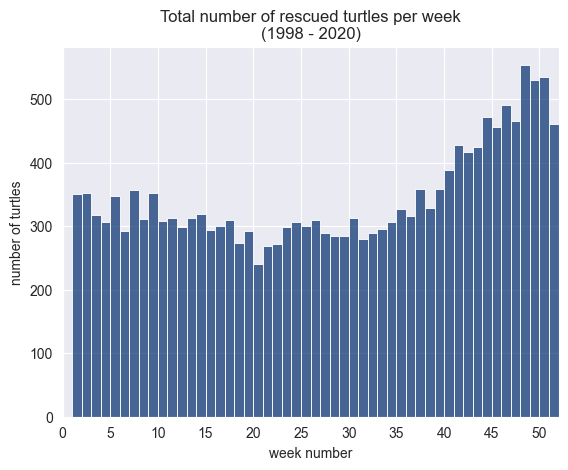

In [27]:
sns.set_style('darkgrid')
sns.histplot(data=df_raw, x="catch_weekofyear", bins=52, color='#113975')
plt.title('Total number of rescued turtles per week\n(1998 - 2020)', fontsize=12)
plt.xlabel('week number')
plt.ylabel('number of turtles')
plt.xlim((1,52))
plt.xticks(ticks=range(0,52,5));

In [28]:
weekly_distr = df_raw.groupby(['catch_weekofyear'])['Rescue_ID'].count().reset_index()
weekly_distr.columns = ['catch_weekofyear', 'TurtleCount']
print(weekly_distr)

    catch_weekofyear  TurtleCount
0                  1          351
1                  2          352
2                  3          317
3                  4          306
4                  5          348
5                  6          293
6                  7          357
7                  8          311
8                  9          352
9                 10          308
10                11          313
11                12          298
12                13          313
13                14          319
14                15          294
15                16          300
16                17          310
17                18          274
18                19          293
19                20          241
20                21          269
21                22          272
22                23          299
23                24          306
24                25          300
25                26          309
26                27          289
27                28          285
28            

<span style=color:plum>

* weekly catch number over the year, summed from all years. week-wise bins
* REMEMBER: this is weekly catch summed over all years!
---
look into climate and fishing seasons:
https://weather-and-climate.com/average-monthly-Rainfall-Temperature-Sunshine,watamu,Kenya

https://www.cheshale.com/deep-sea-fishing#:~:text=Kenya%20generally%20has%20year%20round,in%20July%2C%20August%20and%20September  

https://kenya-fishing.com/fishing-season/

---
now, have a look how the weekly catches vary from year:
* new df with year x week

In [29]:
weekly_distr = df_raw.groupby(['catch_year', 'catch_weekofyear'])['Rescue_ID'].count().reset_index()
weekly_distr.columns = ['catch_year', 'catch_weekofyear', 'TurtleCount']
weekly_distr

,catch_year,catch_weekofyear,TurtleCount
0,1998,16,1
1,1998,28,1
2,1998,32,2
3,1998,39,2
4,1998,43,1
...,...,...,...
998,2018,48,64
999,2018,49,31
1000,2018,50,63
1001,2018,51,28


In [30]:
weekly_distr.describe().T

,count,mean,std,min,25%,50%,75%,max
catch_year,1003.0,2008.852443,5.629102,1998.0,2004.0,2009.0,2014.0,2018.0
catch_weekofyear,1003.0,27.142572,15.051164,1.0,14.0,27.0,40.0,53.0
TurtleCount,1003.0,18.007976,13.589943,1.0,7.0,15.0,26.0,79.0


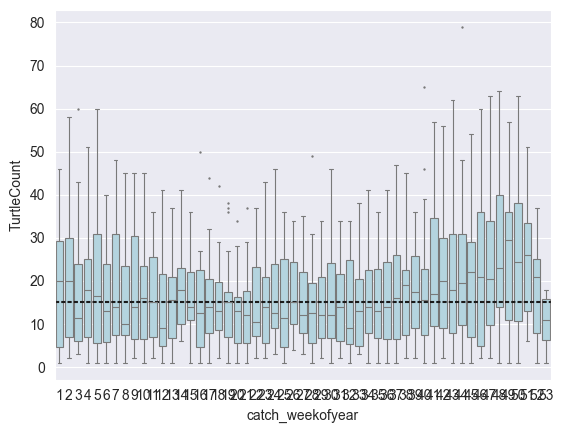

In [31]:
sns.boxplot(x=weekly_distr["catch_weekofyear"], y=weekly_distr["TurtleCount"], color='lightblue', linewidth=0.8, fliersize=0.8)
plt.axhline(15, color=".1", dashes=(2, 1))      # median weekly catches
#plt.axhline(18, color=".1", dashes=(1, 1))      # mean weekly catches

<span style=color:plum>

* looking at all years, the number of catches per week are quite variable
* median over all years is 15 turtles per week
* I dont think i will use this figure for presentation. too crowded

<span style=color:tomato>

### Plot 2 (CaptureSite catches) to explain as important feature for our Baseline Model

,count,mean,std,min,25%,50%,75%,max
TurtleCount,29.0,622.827586,678.482554,29.0,148.0,364.0,714.0,2574.0


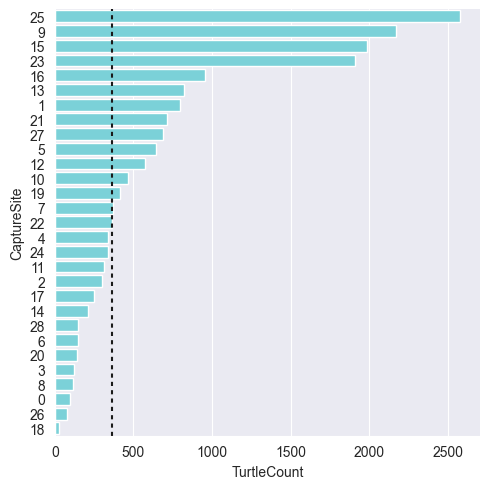

In [32]:
# aggregate the original df to get Turtlecounts by CaptureSite
CaptureSite_df = df_raw.groupby(['CaptureSite'])['Rescue_ID'].count().reset_index()
CaptureSite_df.columns = ['CaptureSite', 'TurtleCount']

sorted_CaptureSite_df = CaptureSite_df.sort_values(by='TurtleCount', ascending=False)
sns.catplot(data=sorted_CaptureSite_df, color='#6cdee7',
            y="CaptureSite", x="TurtleCount",kind="bar")
plt.axvline(sorted_CaptureSite_df.TurtleCount.median(), color=".1", dashes=(2, 2))      # median sum-of-catches of each CaptureSite over the years

CaptureSite_df.describe().T

<span style=color:plum>

* sum of catches over all years: 4 capture sites are highly active

--- 

* if we break it down to weekly-catches per Site, how large is the variation? 

In [33]:
weekly_sites = df_raw.groupby(['catch_weekofyear', 'CaptureSite'])['Rescue_ID'].count().reset_index()
weekly_sites.columns = ['catch_weekofyear', 'CaptureSite', 'TurtleCount']

In [34]:
weekly_sites.describe().T

,count,mean,std,min,25%,50%,75%,max
catch_weekofyear,1422.0,27.158228,15.223214,1.0,14.0,27.5,40.0,53.0
TurtleCount,1422.0,12.701828,14.273580,1.0,4.0,8.0,15.0,102.0


In [35]:
#pd.pivot_table(weekly_sites, index='CaptureSite', columns='catch_weekofyear', aggfunc='sum', margins=True)
#pd.pivot_table(weekly_sites, index='CaptureSite', columns='catch_weekofyear', aggfunc='median', margins=True)

<span style=color:plum>

* to get the capture sites in the same order as in the barchart above

In [36]:
print(sorted_CaptureSite_df.CaptureSite.tolist())

['25', '9', '15', '23', '16', '13', '1', '21', '27', '5', '12', '10', '19', '7', '22', '4', '24', '11', '2', '17', '14', '28', '6', '20', '3', '8', '0', '26', '18']


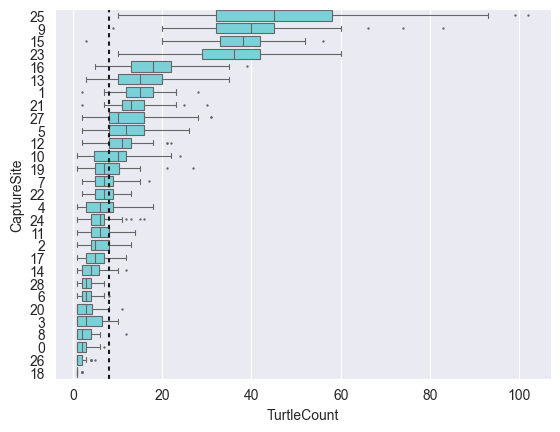

In [37]:
sns.boxplot(y=weekly_sites["CaptureSite"], x=weekly_sites["TurtleCount"], color='#6cdee7', linewidth=0.8, fliersize=0.8, 
            order= ['25', '9', '15', '23', '16', '13', '1', '21', '27', '5', '12', '10', '19', '7', '22', '4', '24', '11',
                     '2', '17', '14', '28', '6', '20', '3', '8', '0', '26', '18']
            )
plt.axvline(weekly_sites.TurtleCount.median(), color=".1", dashes=(2, 2))      # median weekly catches of all CaptureSites over the years

<span style=color:tomato>

---
### ^^ These two features above "catch_weekofyear" and "CaptureSite" will go into our baseline model.

All following EDA below is done to get insights on the importance of other features

---

1. have a look into the years (and months, days)

In [38]:
df_raw.catch_year.nunique() # number of years to use as bins in the barchart

21

<Axes: xlabel='catch_fulldate', ylabel='Count'>

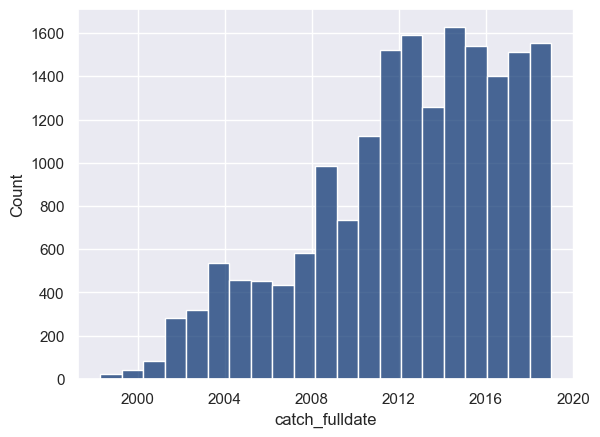

In [39]:
# set a grey background
sns.set(style="darkgrid")
sns.histplot(data=df_raw, x="catch_fulldate", bins=21, color= '#113975')

<span style=color:plum>

there is a steady increase over the 21 years. 
Since 2012 the numbers are quite steady. 
is the drop in the end real or just optical "illusion" from end of data?

<span style=color:tomato>

#### Plot the catches over the span of the year
##### keep in mind, all following plots display the sum of catches over all years

<Axes: xlabel='catch_month', ylabel='Count'>

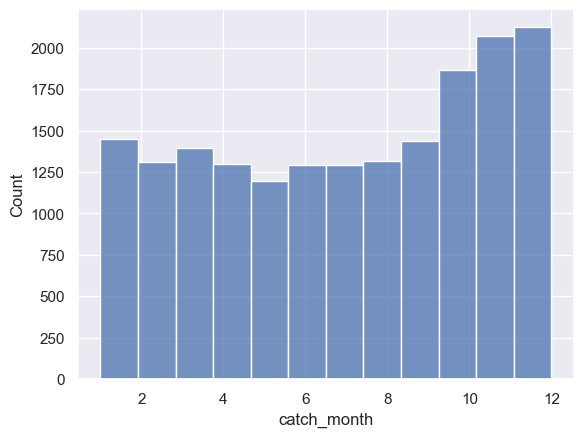

In [40]:
sns.histplot(data=df_raw, x="catch_month", bins=12)

<span style=color:plum>

* monthly catch number is quite steady for 9 months, then increases for october, november, december
* REMEMBER: this is monthly catch summed over all years!
---

<Axes: xlabel='catch_dayofyear', ylabel='Count'>

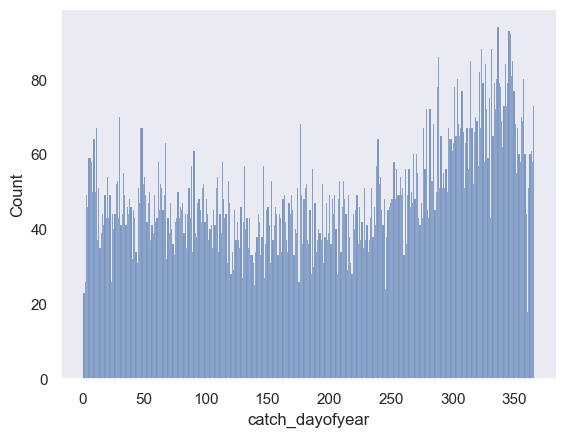

In [63]:
sns.histplot(data=df_raw, x="catch_dayofyear", bins=365)

<span style=color:plum>

* again, same diagram as above but with day-wise bins from jan-dec
* REMEMBER: its the daily catch summed over all years!
---

<Axes: xlabel='catch_dayofweek', ylabel='Count'>

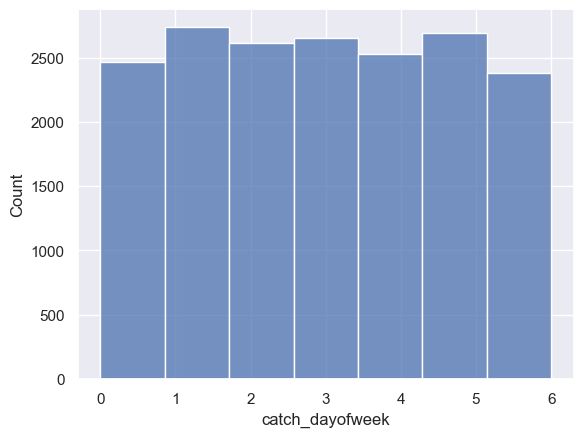

In [42]:
sns.histplot(data=df_raw, x="catch_dayofweek", bins=7)

<span style=color:plum>

* number of catches there is not so much variation over the week. Fishers/Researchers are working every day.
* REMEMBER: week-day-rate summed over all years!
---

<span style=color:tomato>

### As the data above were sums of all years, how does it look like if we add a layer "year"

---

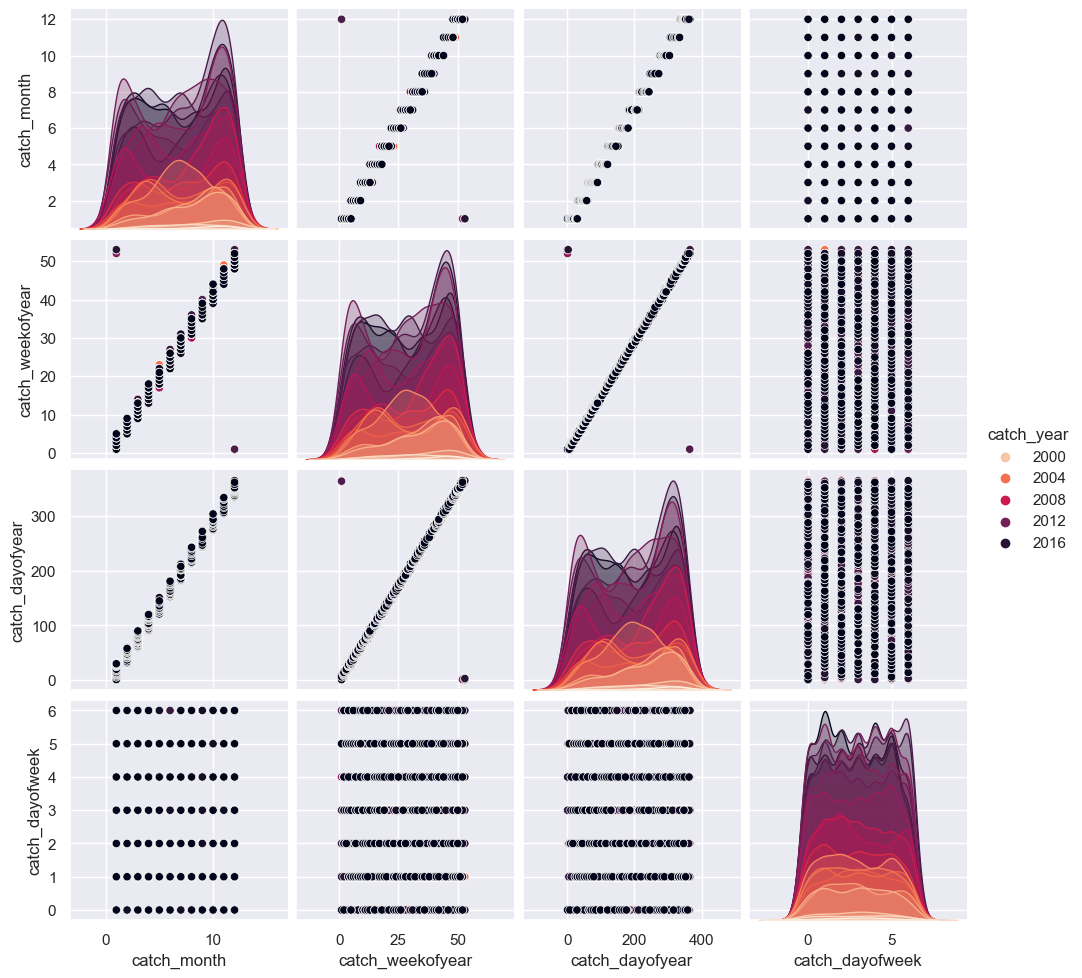

In [43]:
df_timedata = df_raw[['catch_year',
                      'catch_month',
                      'catch_weekofyear',
                      'catch_dayofyear',
                      'catch_dayofweek'
                      ]]
t = sns.pairplot(df_timedata, hue="catch_year", palette='rocket_r')

<span style=color:plum>

* THE COURSE of catches is NOT the same in each year!
* whatever time unit we use (monthofyear or weekofyear or dayofyear), it is the same picture
* stick with week-of-year as this is mentioned in the task

### Hence, YEAR will be another important feature to predict the number of catches after our baseline model
---

<span style=color:tomato>

### Now I want to display the upper data not in one plot together BUT for EACH year on its own

In [44]:
# aggregate the original df to get Turtlecounts by year and week
timeseries_df = df_raw.groupby(['catch_weekofyear', 'catch_year'])['Rescue_ID'].count().reset_index()
timeseries_df.columns = ['catch_weekofyear', 'catch_year', 'TurtleCount']

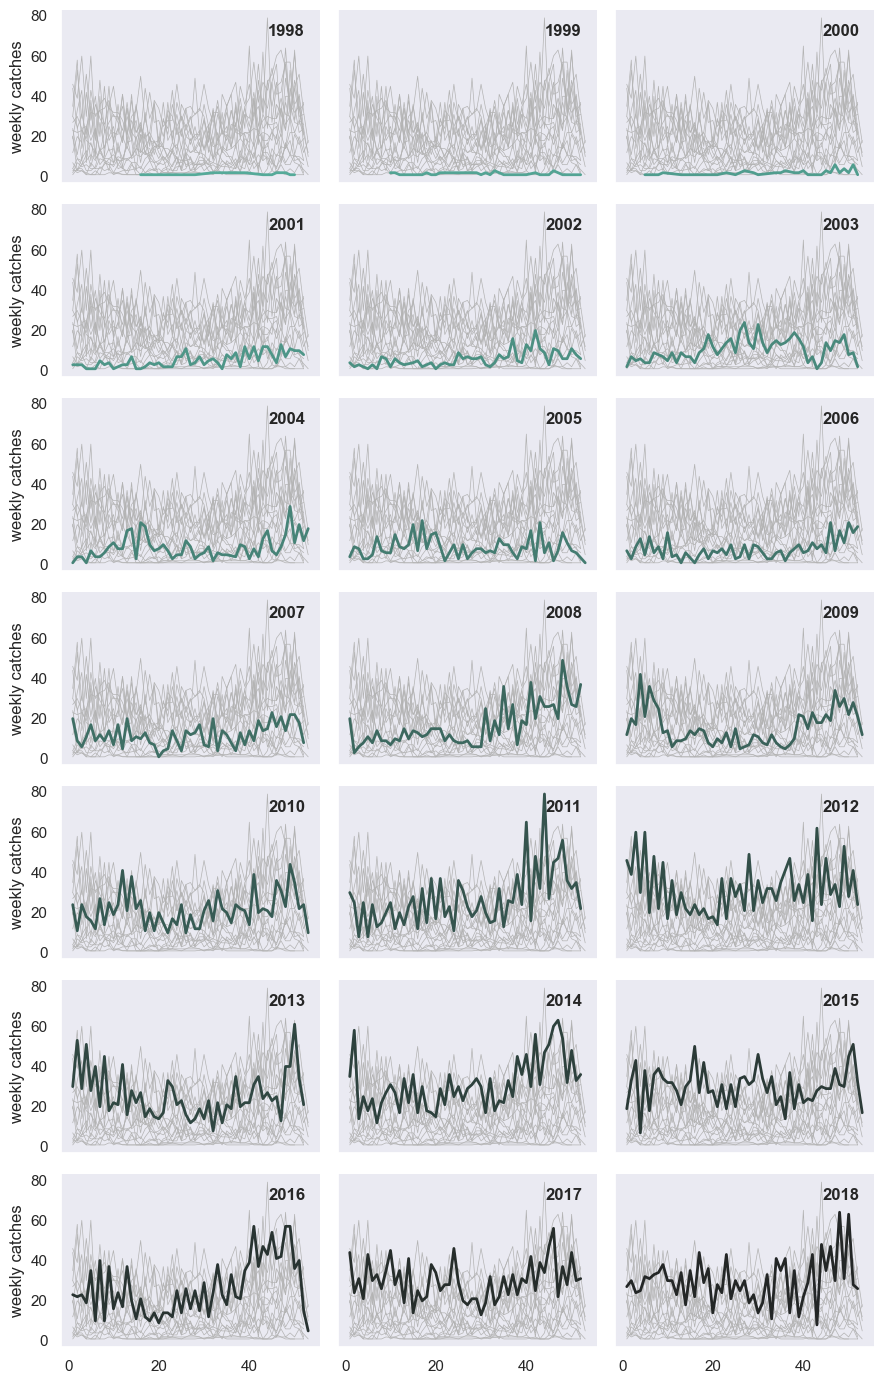

In [45]:
# adapted from https://seaborn.pydata.org/examples/timeseries_facets.html

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=timeseries_df,
    x="catch_weekofyear", 
    y="TurtleCount", 
    col="catch_year", hue="catch_year",
    kind="line", palette="dark:#5A9_r", linewidth=2, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=timeseries_df, 
        x="catch_weekofyear", y="TurtleCount", units="catch_year",
        estimator=None, color=".7", linewidth=0.5, ax=ax,
    )

# Reduce the frequency of the x axis ticks
#ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "weekly catches")
g.tight_layout()

<span style=color:plum>

* this is cool!!! We see that there is a huge difference in weekly catches over the years
* number of catches was low in the first years (until 2009)
* then increased a little bit more in 2010 and 2011
* remained high from 2012 on

* in a lot of years we have a peak of catches between the weeks 40 - 10 of the next year

<span style=color:tomato>

### What about the activity of a certain CaptureSite per year / over the year?

* CaptureSite would be a categorical x-feature. A lineplot is not useful here, Therefore, I will switch the time to the x-axis

In [46]:
# aggregate the original df to get Turtlecounts by year and CaptureSite
timeseries_df2 = df_raw.groupby(['CaptureSite', 'catch_year'])['Rescue_ID'].count().reset_index()
timeseries_df2.columns = ['CaptureSite', 'catch_year', 'TurtleCount']

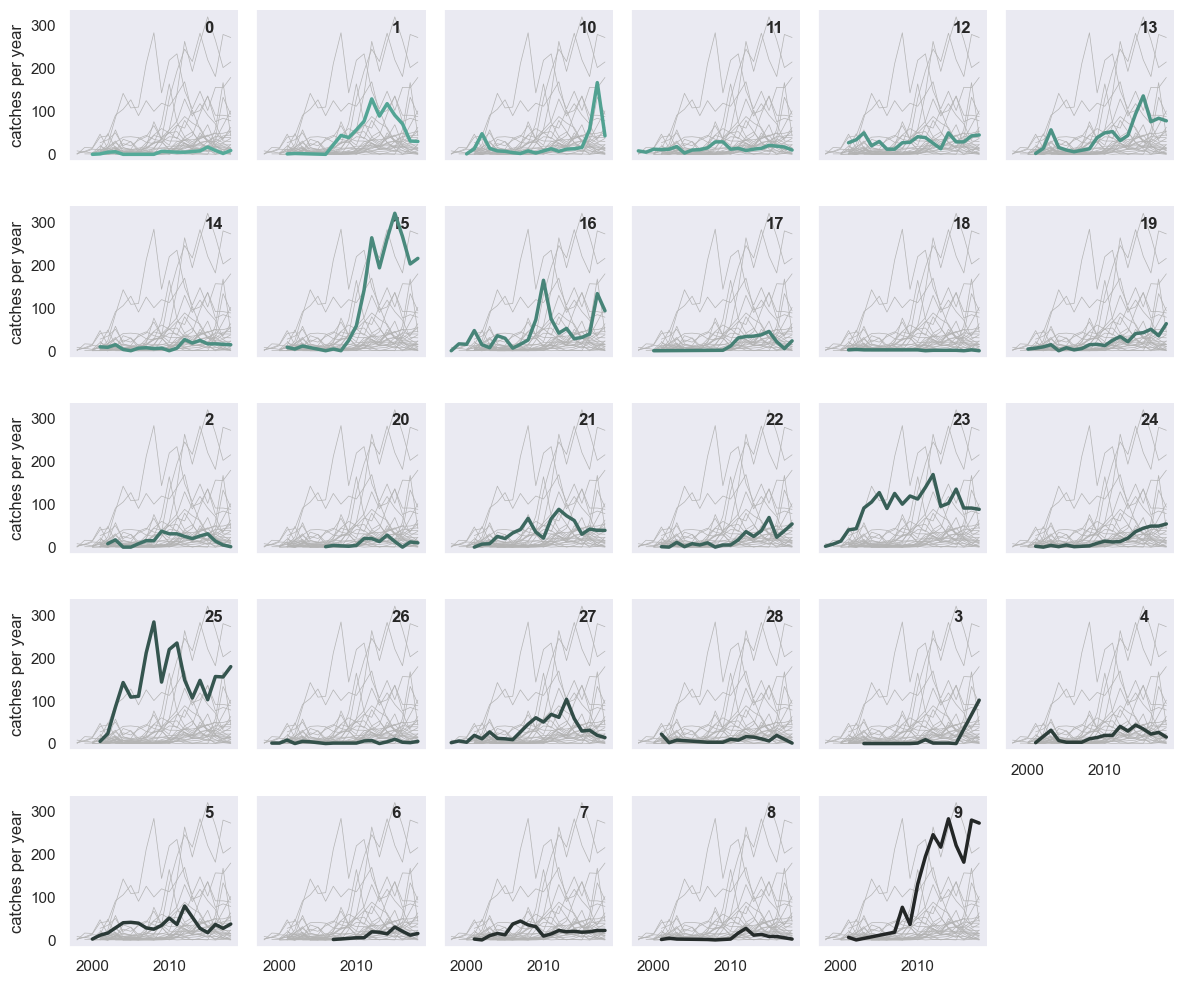

In [47]:
sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=timeseries_df2,
    x="catch_year", y="TurtleCount", col="CaptureSite", hue="CaptureSite",
    kind="line", palette="dark:#5A9_r", linewidth=2.5, zorder=5,
    col_wrap=6, height=2, aspect=1, legend=False,
)
# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=timeseries_df2, 
        x="catch_year", y="TurtleCount", units="CaptureSite",
        estimator=None, color=".7", linewidth=0.5, ax=ax,
    )

# Reduce the frequency of the x axis ticks
#ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "catches per year")
g.tight_layout()

<span style=color:tomato>

#### Year and CaptureSite will be very informative features for the model

#### now check other columns if they have a meaning for Number of turtles catched

---


--- Number of catches that were handled by a specific researcher, top 10 from a total of 35 ---


,count,mean,std,min,25%,50%,75%,max
TurtleCount,35.0,516.057143,1851.294777,1.0,1.5,8.0,38.5,9778.0


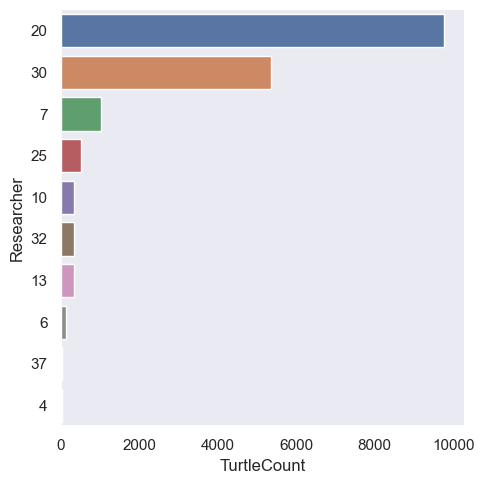

In [48]:
# aggregate the original df to get TurtleCount by researcher and fisher
df_R = df_raw.groupby(['Researcher'])['Rescue_ID'].count().reset_index()
df_F = df_raw.groupby(['Fisher'])['Rescue_ID'].count().reset_index()
df_R.columns = ['Researcher', 'TurtleCount']
df_F.columns = ['Fisher', 'TurtleCount']
sorted_R = df_R.sort_values(by='TurtleCount', ascending=False).head(10)
sorted_F = df_F.sort_values(by='TurtleCount', ascending=False).head(20)

print('\n--- Number of catches that were handled by a specific researcher, top 10 from a total of 35 ---')
sns.catplot(data=sorted_R, 
            y="Researcher", x="TurtleCount",kind="bar")
df_R.describe().T


--- Number of catches per Fisher, top 20 from a total of 2085 ---


,count,mean,std,min,25%,50%,75%,max
TurtleCount,2085.0,8.66283,44.338559,1.0,1.0,1.0,4.0,1499.0


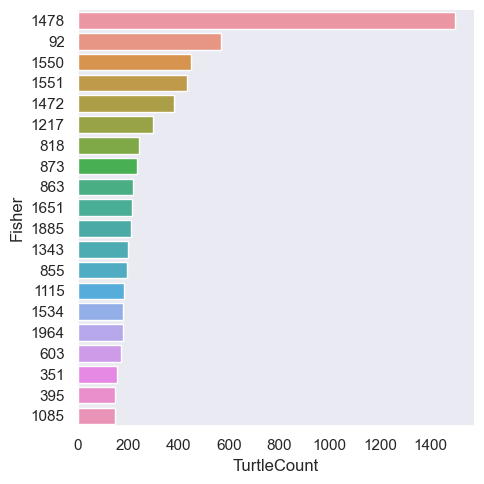

In [49]:
print('\n--- Number of catches per Fisher, top 20 from a total of 2085 ---')
sns.catplot(data=sorted_F, 
            y="Fisher", x="TurtleCount",kind="bar")
df_F.describe().T

<span style=color:plum>

* i am not really sure how important Researcher and Fisher are for prediction.
* if a lot of turtles are handled by a few Researchers/Fishers and all the others by a lot of other Researchers/Fishers, what is the value of this feature?
* if we would forecasting a number in the future, would it make sense to predict by the Fisher?
* maybe, the Fisher might be active at different time points
* so we should find out what is more important: time or fisher or the combination of both would improve our model

---

### make boxplots for all other columns and their turtle catches

In [50]:
df_raw.columns

Index(['Rescue_ID', 'Researcher', 'CaptureSite', 'ForagingGround',
       'CaptureMethod', 'Fisher', 'Species', 'CCW_cm', 'Weight_Kg',
       'CaptureSiteCategory', 'Type', 'catch_fulldate', 'catch_year',
       'catch_month', 'catch_weekofyear', 'catch_dayofyear',
       'catch_dayofweek'],
      dtype='object')

In [51]:
# first aggregate to a new df
cat_df = df_raw.groupby(['ForagingGround', 'CaptureMethod', 'Species', 'CaptureSiteCategory', 'Type'])['Rescue_ID'].count().reset_index()
cat_df.columns = ['ForagingGround', 'CaptureMethod', 'Species', 'CaptureSiteCategory', 'Type', 'TurtleCount']
cat_df

,ForagingGround,CaptureMethod,Species,CaptureSiteCategory,Type,TurtleCount
0,creek,beached,5,0,0,8
1,creek,beached,6,0,0,2
2,creek,beached,6,1,1,1
3,creek,by hand,5,0,0,2
4,creek,by hand,5,4,0,3
...,...,...,...,...,...,...
97,ocean,speargun,5,2,1,1
98,ocean,speargun,6,2,1,1
99,ocean,stranded,5,2,1,7
100,ocean,stranded,6,2,1,9


<Axes: xlabel='TurtleCount', ylabel='Type'>

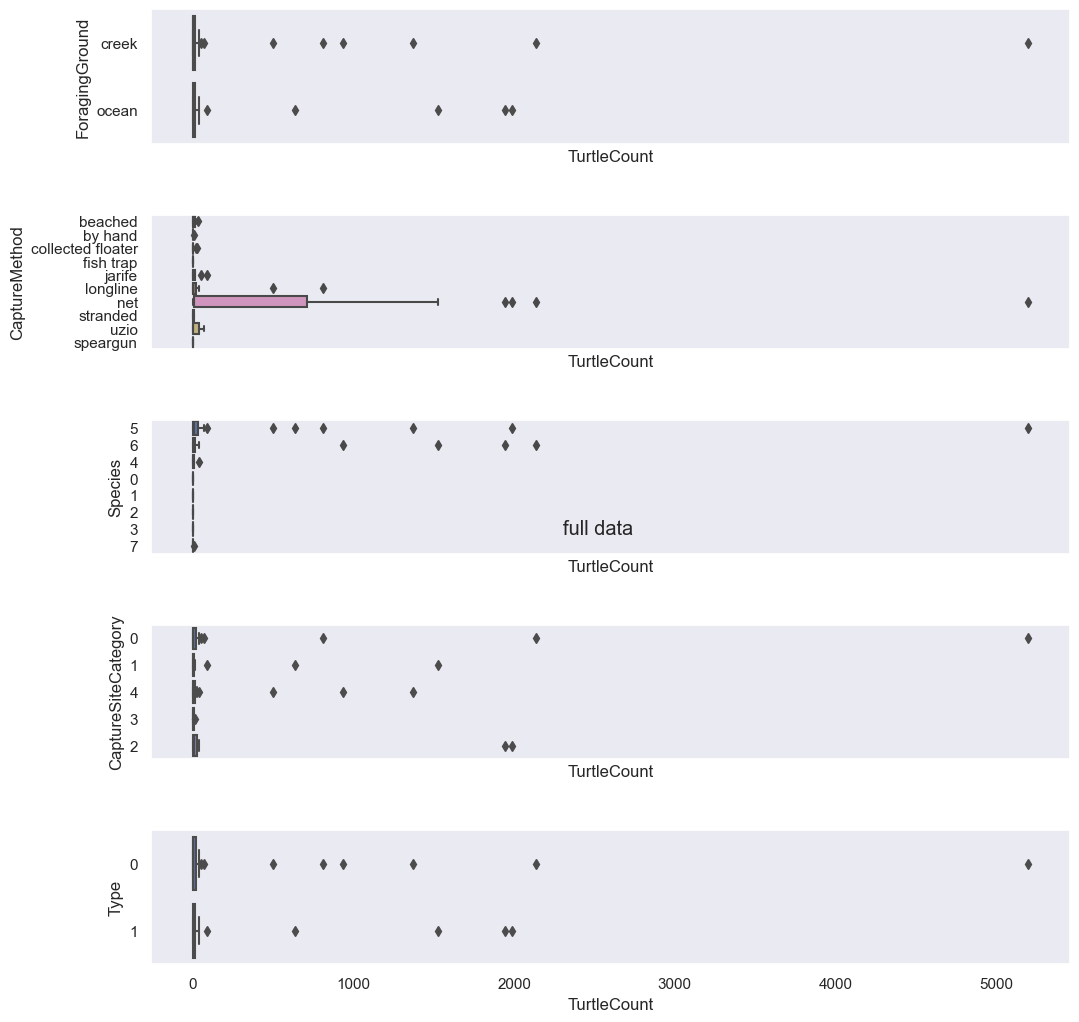

In [52]:
fig, axes = plt.subplots(5, figsize = (10,5), sharex=True)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=None, hspace=None)
fig.suptitle('full data')
             
sns.boxplot(ax=axes[0], y=cat_df['ForagingGround'], x=cat_df['TurtleCount'])            #fliersize, color=
sns.boxplot(ax=axes[1], y=cat_df['CaptureMethod'], x=cat_df['TurtleCount'])
sns.boxplot(ax=axes[2], y=cat_df['Species'], x=cat_df['TurtleCount'])
sns.boxplot(ax=axes[3], y=cat_df['CaptureSiteCategory'], x=cat_df['TurtleCount'])
sns.boxplot(ax=axes[4], y=cat_df['Type'], x=cat_df['TurtleCount'])


<Axes: xlabel='TurtleCount', ylabel='Type'>

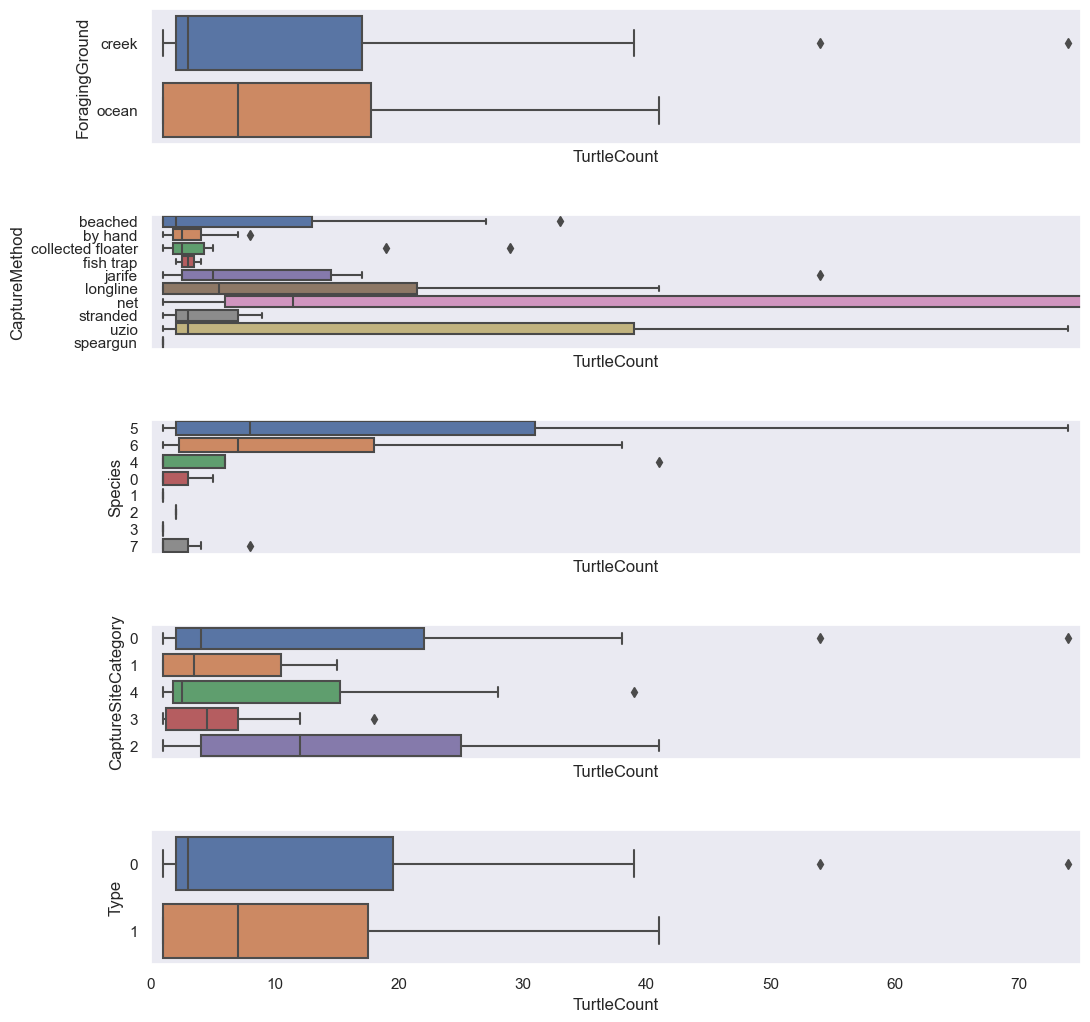

In [53]:
# limit the figure to maximum 75

fig, axes = plt.subplots(5, figsize = (10,5), sharex=True)
plt.xlim(0,75)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=None, hspace=None)
fig.suptitle('')
             
sns.boxplot(ax=axes[0], y=cat_df['ForagingGround'], x=cat_df['TurtleCount'])            #fliersize, color=
sns.boxplot(ax=axes[1], y=cat_df['CaptureMethod'], x=cat_df['TurtleCount'])
sns.boxplot(ax=axes[2], y=cat_df['Species'], x=cat_df['TurtleCount'])
sns.boxplot(ax=axes[3], y=cat_df['CaptureSiteCategory'], x=cat_df['TurtleCount'])
sns.boxplot(ax=axes[4], y=cat_df['Type'], x=cat_df['TurtleCount'])

Text(0.5, 0, 'rescued turtles per week')

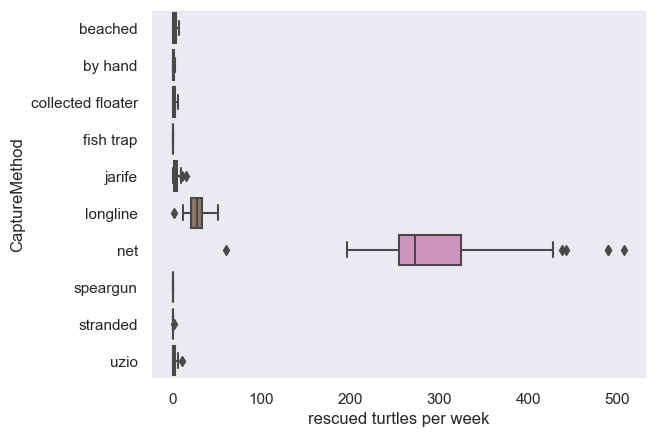

In [64]:
cat_df = df_raw.groupby(['CaptureMethod', 'catch_weekofyear'])['Rescue_ID'].count().reset_index()
cat_df.columns = ['CaptureMethod', 'catchweekofyear', 'TurtleCount']
cat_df

sns.boxplot(y=cat_df['CaptureMethod'], x=cat_df['TurtleCount'])
#plt.xlim(0,60)
plt.xlabel('rescued turtles per week')

In [55]:
cat_df.describe()

,catchweekofyear,TurtleCount
count,322.000000,322.000000
mean,27.645963,55.826087
std,14.590532,114.422950
min,1.000000,1.000000
25%,16.000000,1.000000
50%,28.000000,3.000000
75%,40.000000,26.000000
max,53.000000,508.000000


<span style=color:plum>

sns resources I used:
* https://seaborn.pydata.org/examples/spreadsheet_heatmap.html


Type             0     1    All
CaptureSite                    
0                0    95     95
1                0   793    793
10               0   464    464
11             312     0    312
12               0   573    573
13               0   821    821
14             211     0    211
15            1986     0   1986
16             957     0    957
17             251     0    251
18               0    29     29
19               0   415    415
2                0   301    301
20             143     0    143
21             714     0    714
22             364     0    364
23            1906     0   1906
24               0   337    337
25            2574     0   2574
26               0    77     77
27             686     0    686
28             148     0    148
3                0   121    121
4                0   338    338
5              646     0    646
6              148     0    148
7              369     0    369
8                0   114    114
9                0  2169   2169
All     

<Axes: xlabel='CaptureSite', ylabel='Type'>

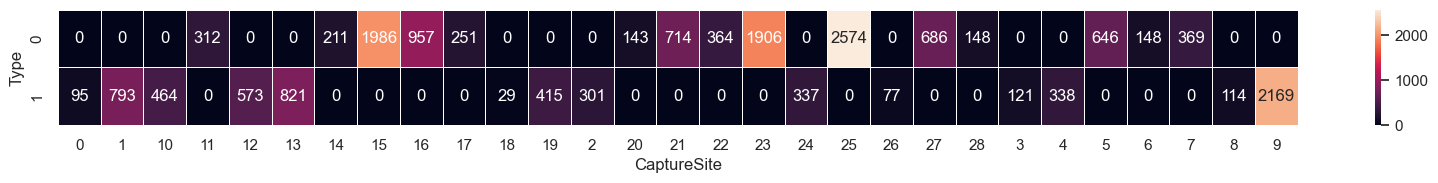

In [56]:
# is there a Zusammenhang zwischen CaptureSiteCategory and Type? --> no
#------------------------------------------------------------------------------------------
crosstabs = pd.crosstab(df_raw.CaptureSite, df_raw.Type, margins=True)
print(crosstabs)

heatmap = pd.crosstab(df_raw.Type, df_raw.CaptureSite)
f, ax = plt.subplots(figsize=(20, 1.5))
sns.heatmap(heatmap, annot=True, fmt="d", linewidths=.5, ax=ax)

Type                     0     1    All
CaptureSiteCategory                    
0                     8469     0   8469
1                        0  2312   2312
2                        0  4258   4258
3                        0    77     77
4                     2946     0   2946
All                  11415  6647  18062


<Axes: xlabel='Type', ylabel='CaptureSiteCategory'>

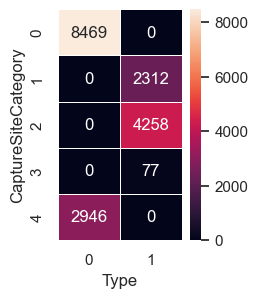

In [57]:
crosstabs = pd.crosstab(df_raw.CaptureSiteCategory, df_raw.Type, margins=True)
print(crosstabs)

heatmap = pd.crosstab(df_raw.CaptureSiteCategory, df_raw.Type)
f, ax = plt.subplots(figsize=(2, 3))
sns.heatmap(heatmap, annot=True, fmt="d", linewidths=.5, ax=ax)

ForagingGround  creek  ocean    All
CaptureSite                        
0                   1     94     95
1                   6    787    793
10                  3    461    464
11                311      1    312
12                 10    563    573
13                  2    819    821
14                198     13    211
15               1954     32   1986
16                955      2    957
17                242      9    251
18                  3     26     29
19                 11    404    415
2                  13    288    301
20                143      0    143
21                714      0    714
22                360      4    364
23               1899      7   1906
24                  0    337    337
25               2572      2   2574
26                 15     62     77
27                686      0    686
28                140      8    148
3                   0    121    121
4                   2    336    338
5                 642      4    646
6                 141      7

<Axes: xlabel='ForagingGround', ylabel='CaptureSite'>

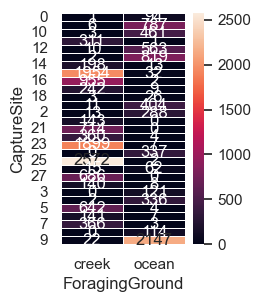

In [58]:
crosstabs = pd.crosstab(df_raw.CaptureSite, df_raw.ForagingGround, margins=True)
print(crosstabs)

heatmap = pd.crosstab(df_raw.CaptureSite, df_raw.ForagingGround)
f, ax = plt.subplots(figsize=(2, 3))
sns.heatmap(heatmap, annot=True, fmt="d", linewidths=.5, ax=ax)

ForagingGround  creek  ocean    All
Type                               
0               11323     92  11415
1                  88   6559   6647
All             11411   6651  18062


<Axes: xlabel='ForagingGround', ylabel='Type'>

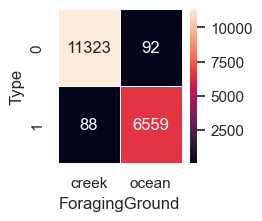

In [59]:
crosstabs = pd.crosstab(df_raw.Type, df_raw.ForagingGround, margins=True)
print(crosstabs)

heatmap = pd.crosstab(df_raw.Type, df_raw.ForagingGround)
f, ax = plt.subplots(figsize=(2, 2))
sns.heatmap(heatmap, annot=True, fmt="d", linewidths=.5, ax=ax)

Species  0  1  2  3   4      5     6   7    All
Type                                           
0        7  1  2  1   2   8166  3228   8  11415
1        0  1  0  0  48   2931  3654  13   6647
All      7  2  2  1  50  11097  6882  21  18062


<Axes: xlabel='Species', ylabel='Type'>

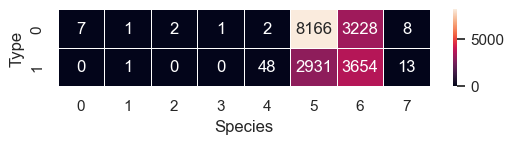

In [60]:
crosstabs = pd.crosstab(df_raw.Type, df_raw.Species, margins=True)
print(crosstabs)

heatmap = pd.crosstab(df_raw.Type, df_raw.Species)
f, ax = plt.subplots(figsize=(6, 1))
sns.heatmap(heatmap, annot=True, fmt="d", linewidths=.5, ax=ax)

Species            0  1  2  3   4      5     6   7    All
CaptureMethod                                            
beached            0  0  0  0   0     60    38   2    100
by hand            0  0  0  0   0     15    12   0     27
collected floater  0  0  0  0   1     41    30   1     73
fish trap          0  0  0  0   0      6     0   0      6
jarife             0  0  0  0   0    167    30   2    199
longline           1  1  0  0  43   1349    68   4   1466
net                6  1  2  1   6   9264  6670  12  15962
speargun           0  0  0  0   0      1     1   0      2
stranded           0  0  0  0   0     10    12   0     22
uzio               0  0  0  0   0    114     5   0    119
All                7  2  2  1  50  11027  6866  21  17976


<Axes: xlabel='Species', ylabel='CaptureMethod'>

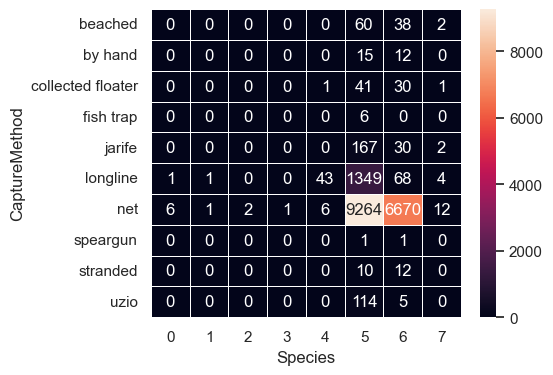

In [66]:
crosstabs = pd.crosstab(df_raw.CaptureMethod, df_raw.Species, margins=True)

print(crosstabs)

heatmap = pd.crosstab(df_raw.CaptureMethod, df_raw.Species)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(heatmap, annot=True, fmt="d", linewidths=.5, ax=ax)

CaptureSite        0    1   10   11   12   13   14    15   16   17  ...   27   
catch_weekofyear                                                    ...        
1                  1   19   24    6   10   14    2    36   11    7  ...   14  \
2                  4   16   11   10    8   10    2    46   11    7  ...   24   
3                  2   15   18    9    7    8    5    41   18    4  ...   13   
4                  1    9    1   11    5    5    0    27   10    4  ...   21   
5                  1   14    8    7    7    4    4    42    7    6  ...   28   
6                  0   17   12    1    4    9    3    28   12    1  ...   20   
7                  2   23   11    3   12    4    6    37   23    6  ...   24   
8                  2   12   12    6    8   11    2    32   16    3  ...   28   
9                  0   15   16    5   13   15    0    37   25    2  ...   24   
10                 1   10   14    1    6   10    1    27   17    8  ...    9   
11                 1   16   13    6    9

<Axes: xlabel='CaptureSite', ylabel='catch_weekofyear'>

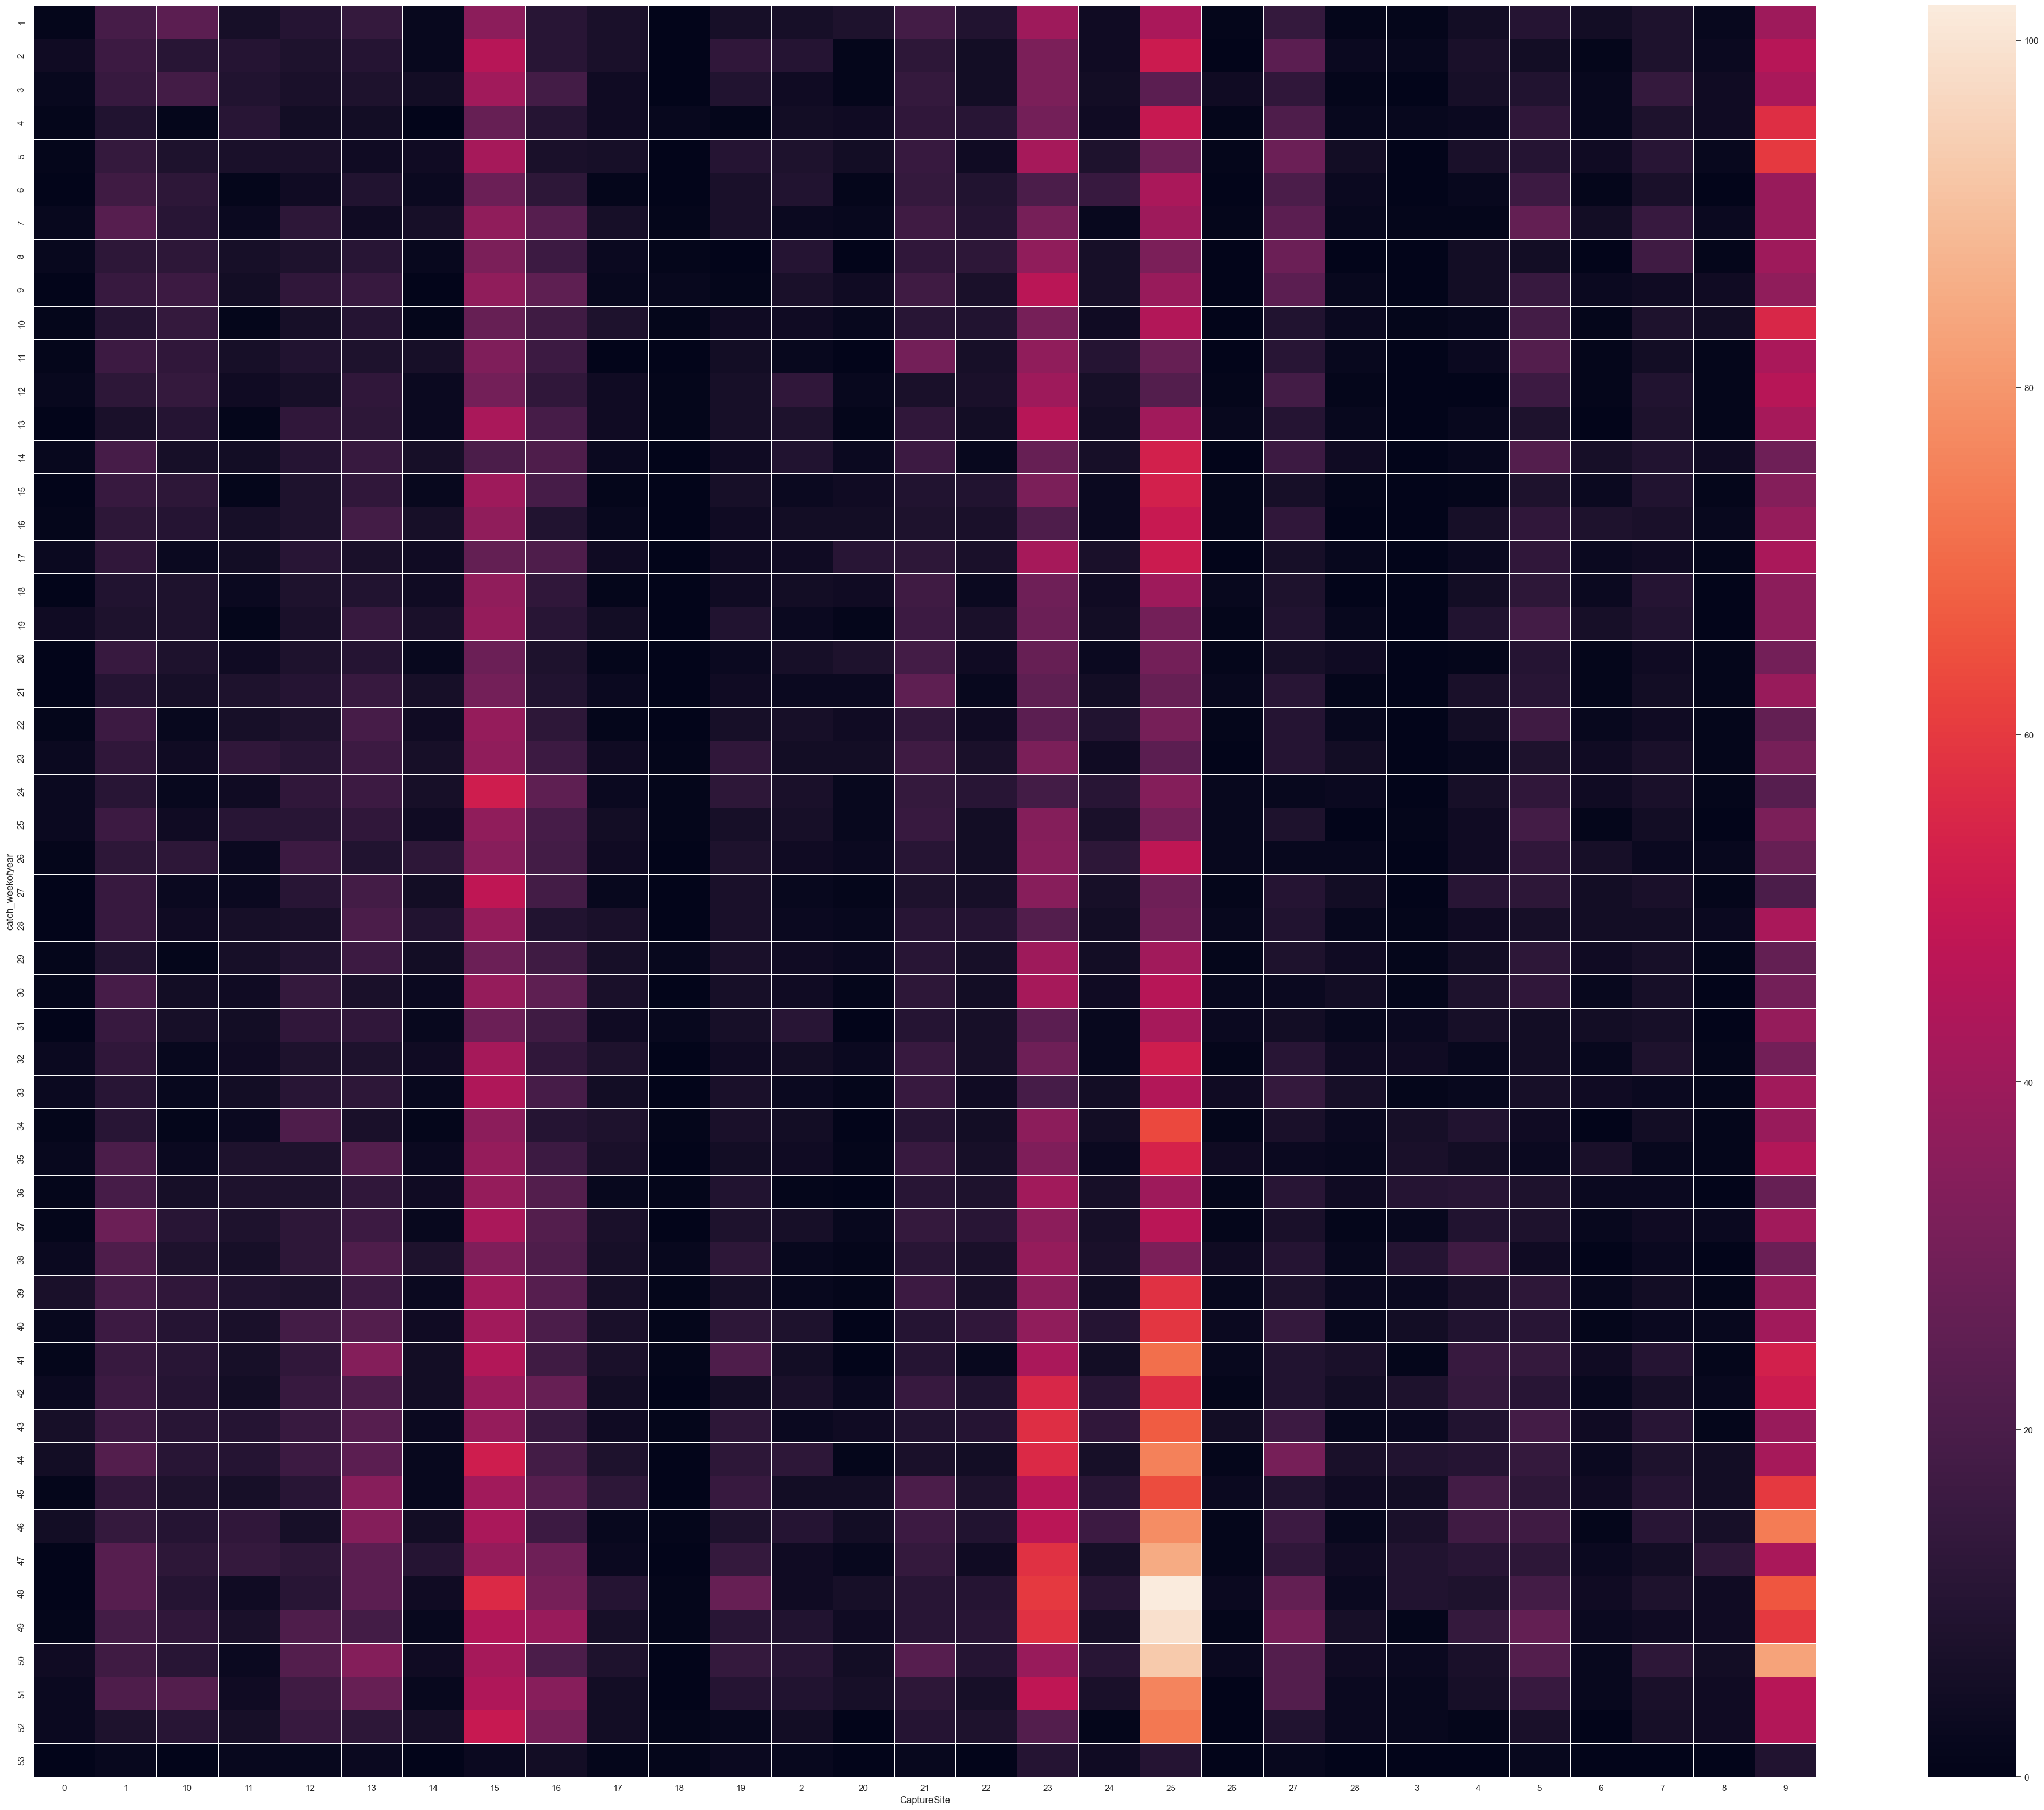

In [62]:
crosstabs = pd.crosstab(df_raw.catch_weekofyear, df_raw.CaptureSite, margins=True)
print(crosstabs)

heatmap = pd.crosstab(df_raw.catch_weekofyear, df_raw.CaptureSite)
f, ax = plt.subplots(figsize=(50, 40))
sns.heatmap(heatmap, annot=False, fmt="d", linewidths=.5, ax=ax)

### I am not sure whether to give one of those into a later model or is it just for EDA?

<span style=color:tomato>

### All modelling see other notebook